# Setting up Yahoo Finance

pip install yfinance

For this example we are using the Apple stock. The ticket symbol for Apple is 'AAPL'.

Further ticker symbols that could be used are the following: 

Stock:
TSLA - Tesla, Inc
NVDA - NVIDIA Corporation
F - Ford Motor Company

Index:
^GSPC - S&P 500
^DJI - Dow Jones Industrial Average

Crypto:
BTC-USD - Bitcoin USD


In [35]:
import yfinance as yf


# Define the ticker symbol
ticker_symbol = "^GSPC"

# Create a Ticker object
ticker = yf.Ticker(ticker_symbol)

# Fetch historical market data
historical_data = ticker.history(period="1mo")  # data for the last year
print("Historical Data:")
print(historical_data)



Historical Data:
                                  Open         High          Low        Close  \
Date                                                                            
2024-09-26 00:00:00-04:00  5762.220215  5767.370117  5721.009766  5745.370117   
2024-09-27 00:00:00-04:00  5755.359863  5763.779785  5727.339844  5738.169922   
2024-09-30 00:00:00-04:00  5726.520020  5765.140137  5703.529785  5762.479980   
2024-10-01 00:00:00-04:00  5757.729980  5757.729980  5681.279785  5708.750000   
2024-10-02 00:00:00-04:00  5698.140137  5719.629883  5674.000000  5709.540039   
2024-10-03 00:00:00-04:00  5698.189941  5718.779785  5677.370117  5699.939941   
2024-10-04 00:00:00-04:00  5737.479980  5753.209961  5702.830078  5751.069824   
2024-10-07 00:00:00-04:00  5737.799805  5739.339844  5686.850098  5695.939941   
2024-10-08 00:00:00-04:00  5719.140137  5757.600098  5714.560059  5751.129883   
2024-10-09 00:00:00-04:00  5751.799805  5796.799805  5745.020020  5792.040039   
2024-10-10 

In [18]:
# Fetch historical market data
historical_data = ticker.history(period="1mo")  # data for the last year
print("Historical Data:")
print(historical_data[['Open', 'High', 'Low', 'Close', 'Volume']])

Historical Data:
                                 Open        High         Low       Close  \
Date                                                                        
2024-09-26 00:00:00-04:00  260.600006  261.750000  251.529999  254.220001   
2024-09-27 00:00:00-04:00  257.380005  260.700012  254.119995  260.459991   
2024-09-30 00:00:00-04:00  259.040009  264.859985  255.770004  261.630005   
2024-10-01 00:00:00-04:00  262.670013  263.980011  248.529999  258.019989   
2024-10-02 00:00:00-04:00  247.550003  251.160004  241.500000  249.020004   
2024-10-03 00:00:00-04:00  244.479996  249.789993  237.809998  240.660004   
2024-10-04 00:00:00-04:00  246.690002  250.960007  244.580002  250.080002   
2024-10-07 00:00:00-04:00  249.000000  249.830002  240.699997  240.830002   
2024-10-08 00:00:00-04:00  243.559998  246.210007  240.559998  244.500000   
2024-10-09 00:00:00-04:00  243.820007  247.429993  239.509995  241.050003   
2024-10-10 00:00:00-04:00  241.809998  242.789993  232.3399

In [20]:
# Fetch basic financials
financials = ticker.financials
print("\nFinancials:")
print(financials)



Financials:
                                                       2023-12-31  \
Tax Effect Of Unusual Items                                   0.0   
Tax Rate For Calcs                                           0.21   
Normalized EBITDA                                   14796000000.0   
Total Unusual Items                                           0.0   
Total Unusual Items Excluding Goodwill                        0.0   
Net Income From Continuing Operation Net Minori...  14999000000.0   
Reconciled Depreciation                              4667000000.0   
Reconciled Cost Of Revenue                          79113000000.0   
EBITDA                                              14796000000.0   
EBIT                                                10129000000.0   
Net Interest Income                                   910000000.0   
Interest Expense                                      156000000.0   
Interest Income                                      1066000000.0   
Normalized Income    

In [21]:

# Fetch stock actions like dividends and splits
actions = ticker.actions
print("\nStock Actions:")
print(actions)


Stock Actions:
Empty DataFrame
Columns: [Dividends, Stock Splits]
Index: []


# Get Live Stock Data

In [25]:
price = ticker.info['currentPrice']
print(price)

269.19


In [27]:
import yfinance as yf
from datetime import datetime
import pandas as pd

def get_stock_value(stock, date, start_time, end_time):
    """
    Get stock values for a specific date and time range.
    
    Parameters:
    stock (str): Stock ticker symbol (e.g., 'AAPL', 'GOOGL')
    date (str): Date in 'YYYY-MM-DD' format
    start_time (str): Start time in 'HH:MM' format (24-hour)
    end_time (str): End time in 'HH:MM' format (24-hour)
    
    Returns:
    pandas.DataFrame: DataFrame containing stock data with columns:
        - Datetime
        - Open
        - High
        - Low
        - Close
        - Volume
    
    Raises:
    ValueError: If date or time format is invalid
    Exception: If there's an error fetching data from Yahoo Finance
    """
    try:
        # Validate and create datetime objects
        try:
            start_datetime = f"{date} {start_time}"
            end_datetime = f"{date} {end_time}"
            start = pd.to_datetime(start_datetime)
            end = pd.to_datetime(end_datetime)
        except ValueError as e:
            raise ValueError("Invalid date or time format. Use 'YYYY-MM-DD' for date and 'HH:MM' for time.")

        # Initialize ticker
        ticker = yf.Ticker(stock)
        
        # Get intraday data (1-minute intervals)
        df = ticker.history(
            start=start,
            end=end,
            interval='1m'
        )
        
        if df.empty:
            return f"No data available for {stock} between {start_datetime} and {end_datetime}"
            
        # Reset index to make datetime a column
        df = df.reset_index()
        
        # Rename columns for consistency
        df = df.rename(columns={'Datetime': 'datetime'})
        
        return df
        
    except Exception as e:
        raise Exception(f"Error fetching data for {stock}: {str(e)}")
    

In [29]:
# data = get_stock_value(
#    stock='TSLA',          
#    date='2024-10-24',     
#    start_time='09:30',    
#    end_time='16:00'       
#)

# Print the range of prices
#print(f"\nPrice range:")
#print(f"Lowest price: ${data['Low'].min():.2f}")
#print(f"Highest price: ${data['High'].max():.2f}")

# Visualize Stock Data 

[*********************100%***********************]  1 of 1 completed


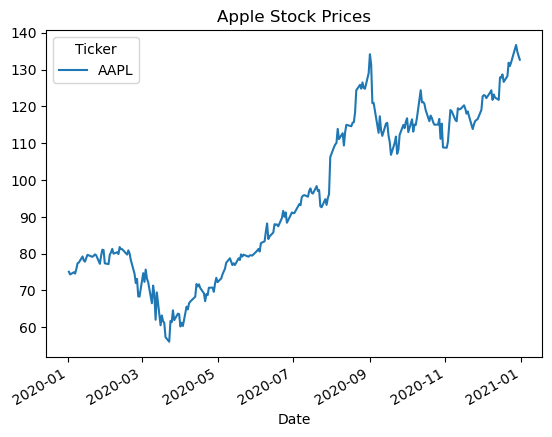

In [32]:
import matplotlib.pyplot as plt
import yfinance as yf

data = yf.download("AAPL", start="2020-01-01", end="2021-01-01")
data['Close'].plot()
plt.title("Apple Stock Prices")
plt.show()